<a href="https://colab.research.google.com/github/AndrzejOlejniczak/PORTFOLIO/blob/main/Random_Forest_Classification_with_Credit_Card_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification
This project is for me to understand the concept of random forest classification.

This content is based on the lecture of Prof. Pedram Jahangiry.

https://www.youtube.com/watch?v=llYimxlsMf4&list=WL&index=83&t=36s

## 1. Prepare the Environment

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os

In [ ]:
# Define some global vars
SEED = 44

## 2. Prepare the data

### 2.1. Load the data

In [ ]:
data_path = 'drive/MyDrive/Colab Notebooks/Credit_Card_Clean'

In [ ]:
os.listdir(data_path)

['credit_card_clean.csv']

In [ ]:
credit_card_data = pd.read_csv(os.path.join(data_path, os.listdir(data_path)[0]))

### 2.2. Inspect the data

In [ ]:
credit_card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### DATASET metadata



    ID : ID of each client

    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

    SEX: Gender (1=male, 2=female)

    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

    MARRIAGE: Marital status (1=married, 2=single, 3=others)

    AGE: Age in years

    PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

    PAY_2: Repayment status in August, 2005 (scale same as above)

    PAY_3: Repayment status in July, 2005 (scale same as above)

    PAY_4: Repayment status in June, 2005 (scale same as above)

    PAY_5: Repayment status in May, 2005 (scale same as above)

    PAY_6: Repayment status in April, 2005 (scale same as above)

    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

    default.payment.next.month: Default payment (1=yes, 0=no)


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  30000 non-null  object 
 4   MARRIAGE   30000 non-null  object 
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [ ]:
credit_card_data.describe()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
credit_card_data.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        4
MARRIAGE         3
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
DEFAULT          2
dtype: int64

### 2.3. Preprocess the data

#### 2.3.1. Encode ordinal categorical variables to integer values

For some reason Author of this code-along treats some of the features as ordinal categorical.

After double-checking in some sources (Wikipedia and Mohr D. L. Wilson W. Freund R. & Mohr D. (2021). Statistical methods ed. 4. Elsevier Science.) I am pretty sure that is an error or a functional simplification.

What the possible sources of this simplification could be?

1. This is random forest so order of the values is not that important?

2. You can treat a variable as an ordinal categorical variable without applying ordinal scale to it?

In this paper nominal nature of some categorical variables is ignored: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6368971/ due to the fact that "that ordering the predictor categories in each split leads to exactly the same splits as the standard approach"


In [ ]:
ordinal_cats = credit_card_data.columns[2:5].tolist()
print(ordinal_cats)

['SEX', 'EDUCATION', 'MARRIAGE']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe_obj = OrdinalEncoder()

In [ ]:
credit_card_data[ordinal_cats] = oe_obj.fit_transform(credit_card_data[ordinal_cats])

In [ ]:
credit_card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0.0,3.0,0.0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0.0,3.0,2.0,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0.0,3.0,2.0,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0.0,3.0,0.0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1.0,3.0,0.0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
oe_obj.categories_

[array(['female', 'male'], dtype=object),
 array(['grad', 'highschool', 'other', 'university'], dtype=object),
 array(['married', 'other', 'single'], dtype=object)]

Since it's random forest we don't scale continous variable features.

In [ ]:
pd.crosstab(credit_card_data['DEFAULT'], credit_card_data['DEFAULT'], normalize='all')

DEFAULT,0,1
DEFAULT,,
0,0.7788,0.0000
1,0.0000,0.2212


### 2.4. Spli the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = credit_card_data['DEFAULT']
X= credit_card_data.drop(['DEFAULT', 'ID'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    shuffle=True,
    test_size=.3,
    random_state=SEED
)

## 3. Build the model

### 3.1. Create and fit Random Forest Classifier Object

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create an instance
RF_Classifier = RandomForestClassifier()

In [ ]:
# Fit RFC to train data
RF_Classifier.fit(X_train, y_train)

RandomForestClassifier()

### 3.2. Predict on test data

In [ ]:
y_preds = RF_Classifier.predict(X_test)
y_preds_proba = RF_Classifier.predict_proba(X_test)[:, 1]

In [ ]:
y_preds[:7]

array([0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_preds_proba[:7]

array([0.11, 0.4 , 0.18, 0.1 , 0.45, 0.08, 0.1 ])

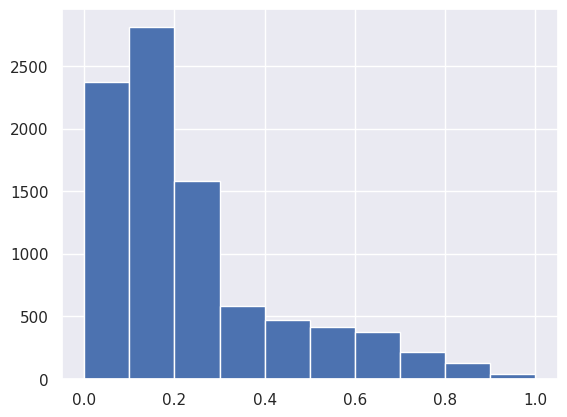

In [ ]:
sns.set()
plt.hist(y_preds_proba)
plt.show()

### 3.3. Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### 3.3.1.  Confusion matrix

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[6612  398]
 [1246  744]]


#### 3.3.2. Built-in classification report

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7010
           1       0.65      0.37      0.48      1990

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



## 4. Hyperparameter tuning

### Gridsearch CV

In [ ]:
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'criterion': ['entropy', 'gini'],
    'max_features': ['log2'],
    'max_depth': [3, 5, 8, 11]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc_grid = GridSearchCV(
    estimator = RandomForestClassifier(
        random_state=SEED
    ),
    param_grid = param_grid,
    refit = True,
    verbose = 2,
    cv = 5
)

In [ ]:
rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=20; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=20; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=20; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=20; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=20; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50; total time=   0.8s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50; total time=   0.7s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50; total time=   0.8s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=50; total time=   0.8s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=5

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=44),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 8, 11], 'max_features': ['log2'],
                         'n_estimators': [20, 50, 100, 200]},
             verbose=2)

In [ ]:
rfc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 50}

In [ ]:
pd.DataFrame(rfc_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.319412,0.013659,0.010478,0.001318,entropy,3,log2,20,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.799524,0.804524,0.800000,0.799524,0.801905,0.801095,0.001926,32
1,0.750296,0.014722,0.018600,0.001301,entropy,3,log2,50,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.800238,0.804286,0.800952,0.802857,0.804524,0.802571,0.001726,30
2,1.719028,0.295739,0.037283,0.007660,entropy,3,log2,100,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.805000,0.808571,0.803095,0.805000,0.805238,0.805381,0.001773,28
3,3.173887,0.395643,0.069615,0.013839,entropy,3,log2,200,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.805714,0.809048,0.803333,0.810238,0.807619,0.807190,0.002449,26
4,0.454306,0.006888,0.010909,0.000346,entropy,5,log2,20,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.806190,0.811667,0.809524,0.807143,0.811905,0.809286,0.002313,24
5,1.114748,0.020944,0.023815,0.004577,entropy,5,log2,50,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.810000,0.814762,0.810714,0.808810,0.814286,0.811714,0.002378,22
6,2.474229,0.443118,0.040579,0.006626,entropy,5,log2,100,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.808810,0.815476,0.810714,0.811190,0.815714,0.812381,0.002744,21
7,4.938896,0.650238,0.089638,0.018306,entropy,5,log2,200,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.811905,0.818333,0.812143,0.812619,0.816429,0.814286,0.002608,18
8,0.646369,0.013920,0.012764,0.000424,entropy,8,log2,20,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.814286,0.818333,0.818571,0.815000,0.820238,0.817286,0.002267,10
9,1.928722,0.319621,0.030552,0.005721,entropy,8,log2,50,"{'criterion': 'entropy', 'max_depth': 8, 'max_...",0.815000,0.820238,0.818333,0.815476,0.824286,0.818667,0.003399,1


In [ ]:
y_preds_tuned = rfc_grid.best_estimator_.predict(X_test)
y_preds_proba_tuned = rfc_grid.best_estimator_.predict_proba(X_test)[:, 1]

In [ ]:
print(confusion_matrix(y_test, y_preds_tuned))

[[6694  316]
 [1278  712]]


In [ ]:
print(classification_report(y_test, y_preds_tuned))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7010
           1       0.69      0.36      0.47      1990

    accuracy                           0.82      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000



## 5. Using cross validation and Out-of-Bag observations to estimate $R^2$ in the test set.

### 5.1. Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy = cross_val_score(
    estimator=RandomForestClassifier(
        n_estimators=50,
        max_features='log2',
        max_depth=8,
        criterion='entropy'
    ),
    X = X_train,
    y = y_train,
    cv=5,
)

In [ ]:
print(accuracy, np.mean(accuracy))

[0.81309524 0.81928571 0.81952381 0.81214286 0.82166667] 0.8171428571428571


### 5.2. Out-of-Bag errors

In [ ]:
RFC_oob = RandomForestClassifier(
    n_estimators=50,
    max_features='log2',
    max_depth=8,
    criterion='entropy',
    oob_score=True
)

In [ ]:
RFC_oob.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=50, oob_score=True)

In [ ]:
RFC_oob.oob_score_

0.8182380952380952

## 6. Dealing with imbalanced datasets

### 6.1. Fit the model balancing dataset

In [ ]:
RFC_balanced = RandomForestClassifier(
    random_state=SEED,
    criterion='entropy',
    max_features='log2',
    max_depth=8,
    n_estimators=50,
    class_weight='balanced_subsample'
)

In [ ]:
RFC_balanced.fit(X_train, y_train)
y_preds_balanced = RFC_balanced.predict(X_test)

In [ ]:
RFC_balanced_2 = RandomForestClassifier(
    random_state=SEED,
    criterion='entropy',
    max_features='log2',
    max_depth=8,
    n_estimators=50,
    class_weight='balanced'
)

In [ ]:
y_preds_balanced_2 = RFC_balanced_2.fit(X_train, y_train).predict(X_test)

### 6.2. Evaluate the model

#### 6.2.1. Confusion matrix

In [ ]:
print(confusion_matrix(y_test, y_preds_balanced))

[[5796 1214]
 [ 797 1193]]


In [ ]:
print(confusion_matrix(y_test, y_preds_balanced_2))

[[5786 1224]
 [ 797 1193]]


#### 6.2.2. Classification report

In [ ]:
print(classification_report(y_test, y_preds_balanced))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7010
           1       0.50      0.60      0.54      1990

    accuracy                           0.78      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.79      0.78      0.78      9000



In [ ]:
print(classification_report(y_test, y_preds_balanced_2))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7010
           1       0.49      0.60      0.54      1990

    accuracy                           0.78      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.79      0.78      0.78      9000



#### 6.2.3. ROC and AUC

In [ ]:
# Generate no skill predictions
ns_preds = [0 for i in range(len(y_test))]

In [ ]:
# Generate logits
y_pred_prob_balanced = RFC_balanced.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_prob_balanced

array([0.26161337, 0.50219761, 0.39023507, ..., 0.22630502, 0.31439187,
       0.30476819])

In [ ]:
# Calculate auc scores for no_skill classifier and balanced RFC
ns_auc = roc_auc_score(y_test, ns_preds)
RFC_auc = roc_auc_score(y_test, y_pred_prob_balanced)

print('No skill: ', ns_auc)
print('Random Forest Classifiers: ', RFC_auc)

No skill:  0.5
Random Forest Classifiers:  0.7783037154388204


In [ ]:
ns_false_positive_rate, ns_true_positive_rate, ns_threshold = roc_curve(y_test, ns_preds)

In [ ]:
RFC_false_positive_rate, RFC_true_positive_rate, RFC_threshold = roc_curve(y_test, y_pred_prob_balanced)

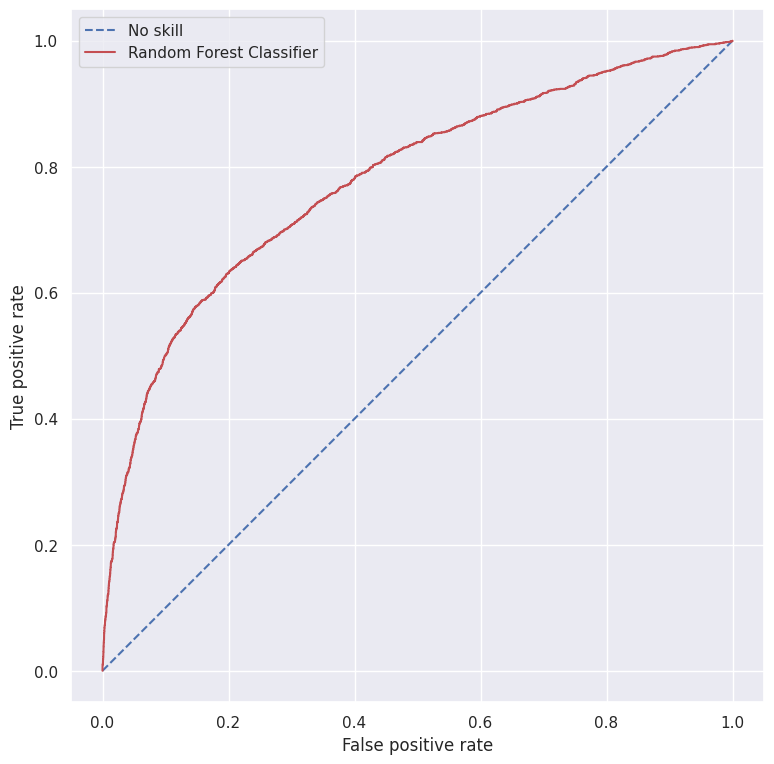

In [ ]:
# Plot roc curve
fig, ax = plt.subplots(figsize=(9, 9))

plt.plot(ns_false_positive_rate, ns_true_positive_rate, linestyle='--', label='No skill')
plt.plot(RFC_false_positive_rate, RFC_true_positive_rate, color='r', label='Random Forest Classifier')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

ax.set_aspect('equal', 'box')

plt.legend()
plt.show()

## 7. Assess feature importance

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature_names': X_train.columns,
    'Feature_importance': RFC_balanced.feature_importances_
    }
)

In [ ]:
feature_importance_df_sorted = feature_importance_df.sort_values('Feature_importance', ascending=False)

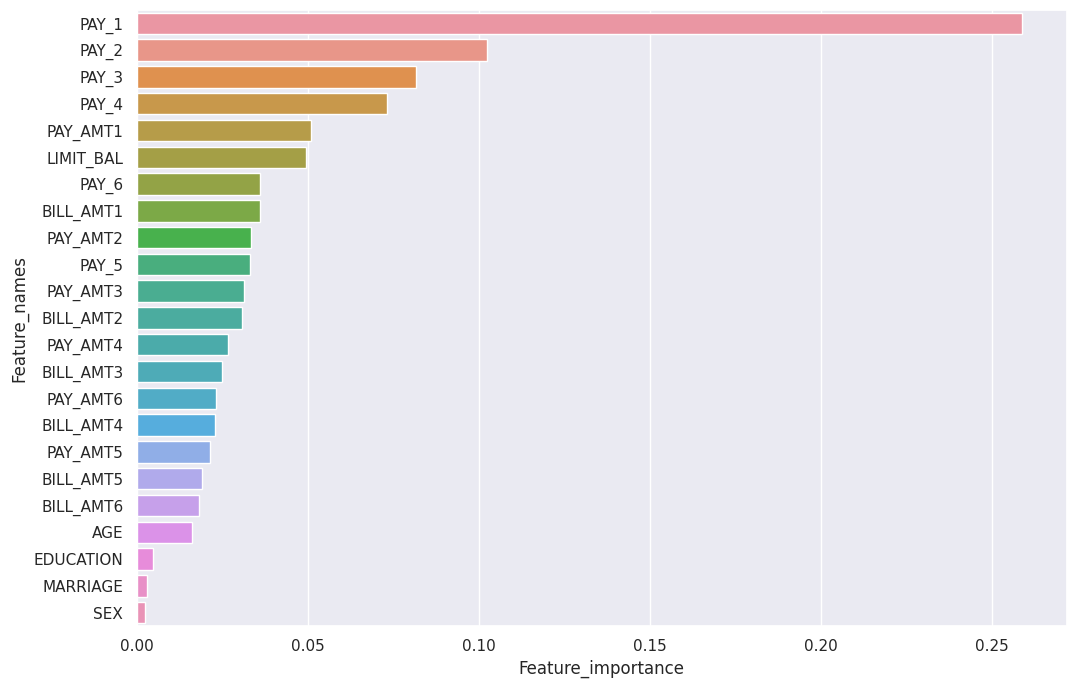

In [ ]:
sns.set()

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(
    data=feature_importance_df_sorted,
    y='Feature_names',
    x='Feature_importance',
    orient='h'
)

plt.show()